# Imran Khan - NYU Capstone/Thesis - Final Project - Part 1 Notebook

In [1]:
#load packages
import pandas as pd
import numpy as np
import geopandas as gpd
import pylab as pl
import os
import plotly
from fiona.crs import from_epsg
from geopandas.tools import sjoin
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#prep for visualization
def colorbar_index(ncolors, cmap, labels=None, **kwargs):
    """
    This is a convenience function to stop you making off-by-one errors
    Takes a standard colour ramp, and discretizes it,
    then draws a colour bar with correctly aligned labels
    """
    cmap = cmap_discretize(cmap, ncolors)
    mappable = cm.ScalarMappable(cmap=cmap)
    mappable.set_array([])
    mappable.set_clim(-0.5, ncolors+0.5)
    colorbar = plt.colorbar(mappable, **kwargs)
    colorbar.set_ticks(np.linspace(0, ncolors, ncolors))
    colorbar.set_ticklabels(range(ncolors))
    if labels:
        colorbar.set_ticklabels(labels)
    return colorbar
def cmap_discretize(cmap, N):
    """
    Return a discrete colormap from the continuous colormap cmap.
        cmap: colormap instance, eg. cm.jet. 
        N: number of colors.
    Example
        x = resize(arange(100), (5,100))
        djet = cmap_discretize(cm.jet, 5)
        imshow(x, cmap=djet)
    """
    if type(cmap) == str:
        cmap = get_cmap(cmap)
    colors_i = np.concatenate((np.linspace(0, 1., N), (0., 0., 0., 0.)))
    colors_rgba = cmap(colors_i)
    indices = np.linspace(0, 1., N + 1)
    cdict = {}
    for ki, key in enumerate(('red', 'green', 'blue')):
        cdict[key] = [(indices[i], colors_rgba[i - 1, ki], 
                       colors_rgba[i, ki]) for i in xrange(N + 1)]
    return matplotlib.colors.LinearSegmentedColormap(cmap.name + "_%d" % N, 
                                                     cdict, 1024)

# School coordinates data

In [3]:
#read in file
schools = gpd.read_file('data/Schools_shape/Public_Schools_Points_2011-2012A.shp')
#drop irrelevant columns
schools = schools[['ATS_CODE', 'LOC_CODE', 'SCHOOLNAME', 'SCH_TYPE',
                   'GEO_DISTRI', 'ADMIN_DIST', 'ADDRESS', 'GRADES', 
                   'geometry']]
#ensure crs is correct
schools = schools.to_crs(epsg=4326)
#format important types correctly
schools.ATS_CODE = schools.ATS_CODE.str.strip()

In [4]:
#preview
schools.head()

,ATS_CODE,LOC_CODE,SCHOOLNAME,SCH_TYPE,GEO_DISTRI,ADMIN_DIST,ADDRESS,GRADES,geometry
0,15K001,K001,P.S. 001 THE BERGEN,Elementary,15,15,309 47 STREET,"PK,0K,01,02,03,04,05,SE",POINT (-74.01176589685977 40.64915359574427)
1,17K002,K002,M.S. 002,Junior High-Intermediate-Middle,17,17,655 PARKSIDE AVENUE,"06,07,08,SE",POINT (-73.95121806510497 40.65642068700407)
2,21K095,K095,P.S. 095 THE GRAVESEND,K-8,21,21,345 VAN SICKLEN STREET,"PK,0K,01,02,03,04,05,06,07,08,SE",POINT (-73.97488433380775 40.59574496211057)
3,21K096,K096,I.S. 096 SETH LOW,Junior High-Intermediate-Middle,21,21,99 AVENUE P,"06,07,08,SE",POINT (-73.98491098572096 40.60778712852029)
4,21K097,K097,P.S. 97 THE HIGHLAWN,Elementary,21,21,1855 STILLWELL AVENUE,"PK,0K,01,02,03,04,05,SE",POINT (-73.98575731504724 40.60125352013942)


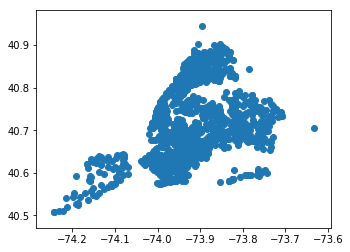

In [5]:
schools.plot()

# School districts shapefile

In [6]:
#read in file
schoolDistricts = gpd.read_file('data/SchoolsDistrict_shape/geo_export_ce0e683f-e1e9-4fc7-943b-d09558525fa5.shp')
#drop irrelevant columns
schoolDistricts = schoolDistricts[['school_dis', 'geometry']]
#preview
schoolDistricts.head()

,school_dis,geometry
0,16.0,POLYGON ((-73.93311862859143 40.69579115384632...
1,32.0,POLYGON ((-73.91180710069435 40.70343495202662...
2,10.0,POLYGON ((-73.86789798628736 40.90294017690526...
3,7.0,(POLYGON ((-73.89680883223774 40.7958084451597...
4,23.0,(POLYGON ((-73.92044366203014 40.6656262871675...


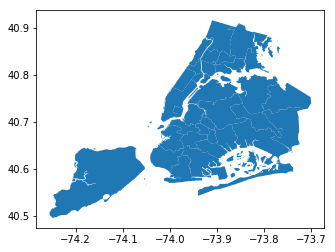

In [7]:
schoolDistricts.plot()

# School zones shapefile

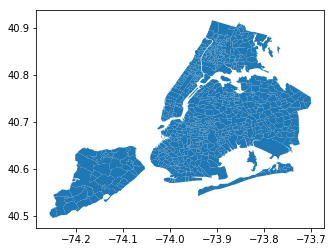

In [8]:
gpd.read_file('data/SchoolsZone_shape/geo_export_938feaf0-e38f-49fc-a875-40af48eb27de.shp').plot()

In [9]:
#read in various school levels
HighSZ = gpd.read_file('data/SchoolsZone_shape/geo_export_859fc339-ae7b-4844-b8b8-624be0a2bf1c.shp')
MiddleSZ = gpd.read_file('data/SchoolsZone_shape/geo_export_31b9e859-debb-460f-a486-243dd646de5c.shp')
ElementarySZ = gpd.read_file('data/SchoolsZone_shape/geo_export_938feaf0-e38f-49fc-a875-40af48eb27de.shp')
#drop irrelevant columns
HighSZ = HighSZ[['hsid_no', 'geometry']]
MiddleSZ = MiddleSZ[['msid_no', 'schooldist', 'geometry']]
ElementarySZ = ElementarySZ[['esid_no','schooldist', 'geometry']]
#drop null values
ElementarySZ.dropna(inplace=True)

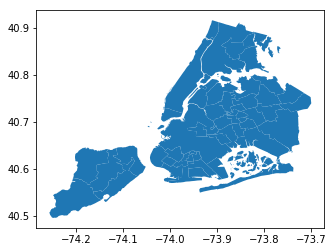

In [10]:
HighSZ.plot()

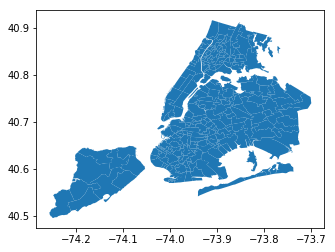

In [11]:
MiddleSZ.plot()

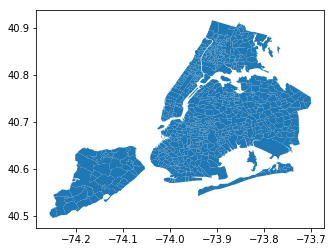

In [12]:
ElementarySZ.plot()

# SCHMA - obtained from Steinhardt Schools/Research Alliance for NYC Schools

In [13]:
#read in data from https://steinhardt.nyu.edu/research_alliance/research/data_sets
SHMA = pd.read_csv('data/schma19962016.csv')
#preview
SHMA.head()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning:

Columns (124,125,126,148,149,150,183,220,221,222,226,227,230,231,232,234,235,247) have mixed types. Specify dtype option on import or set low_memory=False.



,DBN,SCHNAM,YEAR,SCHLEV,SCHLEV5,SCHS219962016,XDBN,XDBN_FLAG,ENRNUMPRK,ENRNUMKID,...,BNLONG_YRFIRST,BNLONG_YRLAST,BNLONG_TOTALYRS,BNLONG_PHASEDOUT19962016,BNLONG_PHASEDIN19962016,BNLONG_CONTOPERATE19962016,CBO,HSJHS,HSSCHSAMP2,SPECHS
0,00M801,HUNTER SCHOOL,1996,NaN,NaN,NaN,00M801,0,16,48,...,1996,1998,3.0,1,0,0,0,NaN,6,0
1,00M802,HUNTER SCHOOL,1996,NaN,NaN,NaN,00M802,0,0,0,...,1996,1998,3.0,1,0,0,0,1.0,6,0
2,00M803,HUNTER SCHOOL,1996,NaN,NaN,NaN,00M803,0,0,0,...,1996,1998,3.0,1,0,0,0,0.0,6,0
3,01M015,ROBERTO CLEMENTE,1996,NaN,NaN,NaN,01M015,0,0,36,...,1996,2016,21.0,0,0,0,0,NaN,6,0
4,01M019,ASHER LEVY,1996,NaN,NaN,NaN,01M019,0,33,82,...,1996,2016,21.0,0,0,0,0,NaN,6,0


# Unique schools list

In [14]:
#create list of schools
SchoolsList = SHMA[['DBN','BNLONG','SCHNAM','XDBN','LCGSCHCAT','HSSCHSAMP2']].drop_duplicates()
#rename school type variable
SchoolsList.HSSCHSAMP2.replace({1: 'GEN/VOC HS' , 2: 'GEN/VOC JHS', 
                                4: 'ALT/DIST. 79 SCHOOL', 5: 'DIST. 75 SCHOOL', 
                                6: 'NO SCHOOL DATA/CHARTER', 7: 'ELEM/MS'}, inplace=True)
#ensure no white space(s) before or after strings
SchoolsList.DBN = SchoolsList.DBN.str.strip()
#preview
SchoolsList.head()

,DBN,BNLONG,SCHNAM,XDBN,LCGSCHCAT,HSSCHSAMP2
0,00M801,M801,HUNTER SCHOOL,00M801,NaN,NO SCHOOL DATA/CHARTER
1,00M802,M802,HUNTER SCHOOL,00M802,NaN,NO SCHOOL DATA/CHARTER
2,00M803,M803,HUNTER SCHOOL,00M803,NaN,NO SCHOOL DATA/CHARTER
3,01M015,M015,ROBERTO CLEMENTE,01M015,NaN,NO SCHOOL DATA/CHARTER
4,01M019,M019,ASHER LEVY,01M019,NaN,NO SCHOOL DATA/CHARTER


In [15]:
SchoolsList.shape

(6323, 6)

In [16]:
schools.head()

,ATS_CODE,LOC_CODE,SCHOOLNAME,SCH_TYPE,GEO_DISTRI,ADMIN_DIST,ADDRESS,GRADES,geometry
0,15K001,K001,P.S. 001 THE BERGEN,Elementary,15,15,309 47 STREET,"PK,0K,01,02,03,04,05,SE",POINT (-74.01176589685977 40.64915359574427)
1,17K002,K002,M.S. 002,Junior High-Intermediate-Middle,17,17,655 PARKSIDE AVENUE,"06,07,08,SE",POINT (-73.95121806510497 40.65642068700407)
2,21K095,K095,P.S. 095 THE GRAVESEND,K-8,21,21,345 VAN SICKLEN STREET,"PK,0K,01,02,03,04,05,06,07,08,SE",POINT (-73.97488433380775 40.59574496211057)
3,21K096,K096,I.S. 096 SETH LOW,Junior High-Intermediate-Middle,21,21,99 AVENUE P,"06,07,08,SE",POINT (-73.98491098572096 40.60778712852029)
4,21K097,K097,P.S. 97 THE HIGHLAWN,Elementary,21,21,1855 STILLWELL AVENUE,"PK,0K,01,02,03,04,05,SE",POINT (-73.98575731504724 40.60125352013942)


In [17]:
print(schools.shape)
print(schools.ATS_CODE.unique().shape)

(1709, 9)
(1708,)


In [18]:
print(SchoolsList.shape)
print(SchoolsList.DBN.unique().shape)

(6323, 6)
(2144,)


# Merging with spatial data to determine different groupings

In [19]:
#merge data with coordinates
SchoolsList_ = pd.merge(SchoolsList, schools, left_on='DBN', right_on='ATS_CODE', how="left")
#determine missing schools
#create missing schools list without coordinates
missing_schools = SchoolsList_[['DBN','SCHNAM']][SchoolsList_['ATS_CODE'].isnull()]
#save to csv
missing_schools.to_csv('MissingSchools.csv')
#remove null values
SchoolsList_.dropna(inplace=True)
#convert to geodataframe
SchoolsList_ = gpd.GeoDataFrame(SchoolsList_, crs=4326, geometry=SchoolsList_.geometry)

In [20]:
#spatially join all zones for easy mapping
SchoolsList_ = sjoin(SchoolsList_, schoolDistricts)
SchoolsList_.drop(['index_right'],axis=1, inplace=True)
SchoolsList_ = sjoin(SchoolsList_, HighSZ)
SchoolsList_.drop(['index_right'],axis=1, inplace=True)
SchoolsList_ = sjoin(SchoolsList_, MiddleSZ)
SchoolsList_.drop(['index_right'],axis=1, inplace=True)
SchoolsList_.rename(columns={'schooldist':'schooldist_ms'},inplace=True)
SchoolsList_ = sjoin(SchoolsList_, ElementarySZ)
SchoolsList_.drop(['index_right'],axis=1, inplace=True)
SchoolsList_.rename(columns={'schooldist':'schooldist_es'},inplace=True)

In [21]:
SchoolsList_

,DBN,BNLONG,SCHNAM,XDBN,LCGSCHCAT,HSSCHSAMP2,ATS_CODE,LOC_CODE,SCHOOLNAME,SCH_TYPE,...,ADMIN_DIST,ADDRESS,GRADES,geometry,school_dis,hsid_no,msid_no,schooldist_ms,esid_no,schooldist_es
2572,01M015,M015,ROBERTO CLEMENTE,01M015,ELEMENTARY,ELEM/MS,01M015,M015,P.S. 015 ROBERTO CLEMENTE,Elementary,...,1.0,333 EAST 4 STREET,"PK,0K,01,02,03,04,05,SE",POINT (-73.97881143093529 40.72189107724469),1.0,4.0,81.0,1.0,502.0,0.0
2573,01M019,M019,ASHER LEVY,01M019,ELEMENTARY,ELEM/MS,01M019,M019,P.S. 019 ASHER LEVY,Elementary,...,1.0,185 1 AVENUE,"PK,0K,01,02,03,04,05,SE",POINT (-73.98417971283783 40.72973959019929),1.0,4.0,81.0,1.0,502.0,0.0
2575,01M034,M034,FRANKLIN D. ROOSEVELT,01M034,ELEMENTARY,ELEM/MS,01M034,M034,P.S. 034 FRANKLIN D. ROOSEVELT,K-8,...,1.0,730 EAST 12 STREET,"PK,0K,01,02,03,04,05,06,07,08,SE",POINT (-73.97522068045814 40.72626637763186),1.0,4.0,81.0,1.0,502.0,0.0
2577,01M063,M063,WILLIAM MCKINLEY,01M063,ELEMENTARY,ELEM/MS,01M063,M063,P.S. 063 WILLIAM MCKINLEY,Elementary,...,1.0,121 EAST 3 STREET,"PK,0K,01,02,03,04,05,SE",POINT (-73.98633972068826 40.72443612519024),1.0,4.0,81.0,1.0,502.0,0.0
2578,01M064,M064,ROBERT SIMON,01M064,ELEMENTARY,ELEM/MS,01M064,M064,P.S. 064 ROBERT SIMON,Elementary,...,1.0,600 EAST 6 STREET,"PK,0K,01,02,03,04,05,SE",POINT (-73.98154865385681 40.7241961334534),1.0,4.0,81.0,1.0,502.0,0.0
2585,01M188,M188,ISLAND SCHOOL/PS 188,01M188,K-8,ELEM/MS,01M188,M188,P.S. 188 THE ISLAND SCHOOL,K-8,...,1.0,442 EAST HOUSTON STREET,"PK,0K,01,02,03,04,05,06,07,08,SE",POINT (-73.97744358723909 40.72001158067255),1.0,4.0,81.0,1.0,502.0,0.0
2587,01M450,M450,EAST SIDE COMMUNITY HIGH SCHOO,01M450,COLLABORATIVE OR MUL,ELEM/MS,01M450,M450,EAST SIDE COMMUNITY HIGH SCHOOL,Secondary School,...,1.0,420 EAST 12 STREET,"06,07,08,09,10,11,12,SE",POINT (-73.9823585548357 40.72925622362532),1.0,4.0,81.0,1.0,502.0,0.0
3588,75M094,M094,P094M @ P196M,75M094,UNGRADED,DIST. 75 SCHOOL,75M094,M094,P.S. M094,K-8,...,75.0,442 EAST HOUSTON STREET,"0K,01,02,03,04,05,06,07,08,SE",POINT (-73.97760747231416 40.71978878312362),1.0,4.0,81.0,1.0,502.0,0.0
3597,75M751,M751,MANHATTAN SCHOOL FOR CAREER DE,75M751,UNGRADED,DIST. 75 SCHOOL,75M751,M751,MANHATTAN SCHOOL FOR CAREER DEVELOPMENT,High school,...,75.0,113 EAST 4TH STREET,"08,09,10,11,12,SE",POINT (-73.98788842841793 40.72571968838204),1.0,4.0,81.0,1.0,502.0,0.0
3671,01M315,M315,THE EAST VILLAGE COMMUNITY SCH,01M315,ELEMENTARY,ELEM/MS,01M315,M315,THE EAST VILLAGE COMMUNITY SCHOOL,Elementary,...,1.0,610 EAST 12 STREET,"PK,0K,01,02,03,04,05,SE",POINT (-73.97857615945131 40.72774773542835),1.0,4.0,81.0,1.0,502.0,0.0


In [22]:
SchoolsList_.hsid_no.unique().shape

(54,)

In [23]:
HighSZ.hsid_no.unique().shape

(83,)

# Cluster visualization

In [24]:
#read in cluster file
clusters = pd.read_csv('data/clusterAssignments.csv', index_col=0)
#merge with schools list to create cluster shapefile
cluster_shape = SchoolsList_.merge(clusters, on='BNLONG', how='outer')
#review 
cluster_shape.head()

,DBN,BNLONG,SCHNAM,XDBN,LCGSCHCAT,HSSCHSAMP2,ATS_CODE,LOC_CODE,SCHOOLNAME,SCH_TYPE,...,HSOPCTDRPTOT_cluster,ENRNUMAFM_cluster,ENRNUMHIS_cluster,ENRNUMWHT_cluster,ENRNUMSPD_cluster,ENRPCTAFM_cluster,ENRPCTHIS_cluster,ENRPCTWHT_cluster,STCELAPCTL34TOT_cluster,STCMTHPCTL34TOT_cluster
0,01M015,M015,ROBERTO CLEMENTE,01M015,ELEMENTARY,ELEM/MS,01M015,M015,P.S. 015 ROBERTO CLEMENTE,Elementary,...,NaN,3.0,4.0,2.0,4.0,0.0,4.0,2.0,0.0,2.0
1,01M015,M015,P.S. 015 ROBERTO CLEMENTE,01M015,ELEMENTARY,ELEM/MS,01M015,M015,P.S. 015 ROBERTO CLEMENTE,Elementary,...,NaN,3.0,4.0,2.0,4.0,0.0,4.0,2.0,0.0,2.0
2,01M019,M019,ASHER LEVY,01M019,ELEMENTARY,ELEM/MS,01M019,M019,P.S. 019 ASHER LEVY,Elementary,...,NaN,4.0,4.0,4.0,2.0,1.0,3.0,1.0,1.0,2.0
3,01M019,M019,P.S. 019 ASHER LEVY,01M019,ELEMENTARY,ELEM/MS,01M019,M019,P.S. 019 ASHER LEVY,Elementary,...,NaN,4.0,4.0,4.0,2.0,1.0,3.0,1.0,1.0,2.0
4,01M034,M034,FRANKLIN D. ROOSEVELT,01M034,ELEMENTARY,ELEM/MS,01M034,M034,P.S. 034 FRANKLIN D. ROOSEVELT,K-8,...,NaN,1.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,2.0


In [25]:
cluster_shape.columns

Index([                    u'DBN',                  u'BNLONG',
                        u'SCHNAM',                    u'XDBN',
                     u'LCGSCHCAT',              u'HSSCHSAMP2',
                      u'ATS_CODE',                u'LOC_CODE',
                    u'SCHOOLNAME',                u'SCH_TYPE',
                    u'GEO_DISTRI',              u'ADMIN_DIST',
                       u'ADDRESS',                  u'GRADES',
                      u'geometry',              u'school_dis',
                       u'hsid_no',                 u'msid_no',
                 u'schooldist_ms',                 u'esid_no',
                 u'schooldist_es',    u'HSOPCTDRPTOT_cluster',
             u'ENRNUMAFM_cluster',       u'ENRNUMHIS_cluster',
             u'ENRNUMWHT_cluster',       u'ENRNUMSPD_cluster',
             u'ENRPCTAFM_cluster',       u'ENRPCTHIS_cluster',
             u'ENRPCTWHT_cluster', u'STCELAPCTL34TOT_cluster',
       u'STCMTHPCTL34TOT_cluster'],
      dtype='object

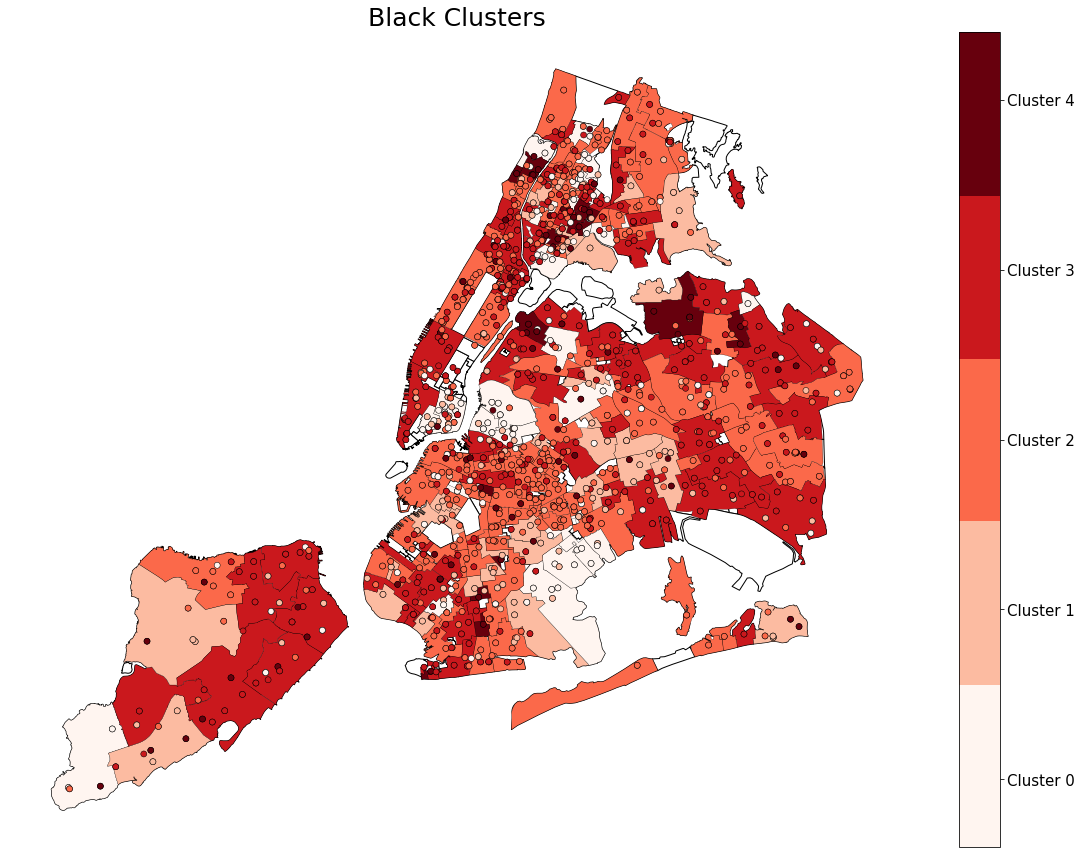

In [31]:
#create black groups
BlackHigh = cluster_shape.groupby(['msid_no','ENRPCTAFM_cluster'])['DBN'].count().reset_index()
#merge with high school zones
BlackHigh = MiddleSZ.merge(BlackHigh, on='msid_no')
#find dominant clusters per zone
maxindex = []
for i in BlackHigh.msid_no.unique():
    maxindex.append(BlackHigh[BlackHigh.msid_no == i]['DBN'].idxmax(axis=1))
#create new dataframe with dominant clusters only
MaxBlackHigh = BlackHigh.loc[maxindex]
fig,ax = pl.subplots(figsize=(20,15))
ElementarySZ.plot(ax=ax, color='white', edgecolor='black',linewidth=1)
MaxBlackHigh.plot(column='ENRPCTAFM_cluster', cmap='Reds',ax=ax, edgecolor='black', linewidth=0.25, legend=False)
cluster_shape.plot(column='ENRPCTAFM_cluster',ax=ax, cmap='Reds', edgecolor='Black', linewidth=0.5)
#format plot
ax.set_title('Black Clusters',fontsize=25)
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off');
#add a color bar
cb = colorbar_index(ncolors=5, cmap='Reds',
                    labels=['Cluster 0','Cluster 1','Cluster 2',
                            'Cluster 3','Cluster 4'])
cb.ax.tick_params(labelsize=15)

The above visualization shows black student enrollment density within schools mapped over school zones. Density ranges are classified according to color, with darker colors representing higher density of black student enrollment.